In [96]:
# Project 1: Create 95% confidence interval using monte carlo simulations

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

# Using quandl for data
import quandl

# Using pandas_market_calendars to get open market days
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')

In [98]:
# Quandl API key
from secrets import API_TOKEN
quandl.ApiConfig.api_key = API_TOKEN

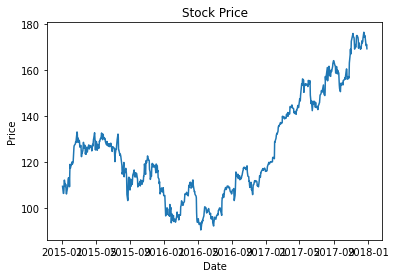

In [99]:
# Tests the code on AAPL

# Obtains the closing stock price of AAPL between Jan 1st 2015 - Jan 1st 2018
df = quandl.get("WIKI/AAPL", start_date = "2015-01-01", end_date = "2018-01-01", column_index = 4, returns="numpy", authtoken=quandl.ApiConfig.api_key)

# Make it so that there are two columns in the dataframe
df = pd.DataFrame(df, columns = ['Date', 'Close'])

# set the 'Date' column as the DataFrame index
#df.set_index('Date', inplace=True)

# Plot the DataFrame using Matplotlib
plt.plot(df['Date'], df['Close'])

# Add a title and axis labels
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()


# Functional Predicting Code

In [172]:
import matplotlib.dates as mdates

def CIwithMonteCarlo(ticker, start_date, end_date, future_end_date):
    # Obtain historical stock data
    df = quandl.get(f"WIKI/{ticker}", start_date=start_date, end_date=end_date, column_index=4, returns="numpy", authtoken=quandl.ApiConfig.api_key)

    # Make it so that there are two columns in the dataframe
    df = pd.DataFrame(df, columns = ['Date', 'Close'])

    # Calculate average daily return and standard deviation
    daily_returns = df['Close'].pct_change()
    avg_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()
    
    # Use Monte Carlo method to generate possible future stock prices
    num_simulations = 10
    mydates = nyse.valid_days(start_date=end_date, end_date=future_end_date)

    predicted_data = []
    for i in range(len(mydates)):
        change = (1 + np.random.normal(avg_daily_return, std_daily_return, (1, num_simulations)))
        avg_change = np.average(change)
        nextprice = df['Close'].iloc[-1] * avg_change

        predicted_data.append([mydates[i], nextprice]) 

    # Separate the actual data from the predicted data
    actual_data = df[df['Date'] <= end_date]
    predicted_df = pd.DataFrame(predicted_data, columns=['Date', 'Close'])
    
    # Plot the actual data in blue and the predicted data in red
    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size to 10 inches wide and 6 inches tall
    ax.plot(actual_data['Date'], actual_data['Close'], color='blue')
    ax.plot(predicted_df['Date'], predicted_df['Close'], color='red')

    # Set the x-axis labels to show only years
    years = mdates.YearLocator()   # Every year
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    # Add a title and axis labels
    ax.set_title(f"{ticker} Stock Price Prediction")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

    # Show the plot
    plt.show()


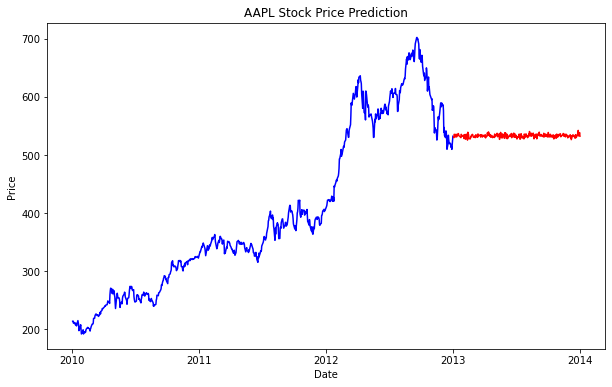

In [174]:
CIwithMonteCarlo('AAPL', '2010-01-01', '2013-01-01', '2014-01-01')

# Testing Below

In [169]:
import matplotlib.dates as mdates

def CIwithMonteCarlo(ticker, start_date, end_date, future_end_date):
    # Obtain historical stock data
    df = quandl.get(f"WIKI/{ticker}", start_date=start_date, end_date=end_date, column_index=4, returns="numpy", authtoken=quandl.ApiConfig.api_key)

    # Make it so that there are two columns in the dataframe
    df = pd.DataFrame(df, columns = ['Date', 'Close'])

    # Calculate average daily return and standard deviation
    daily_returns = df['Close'].pct_change()
    avg_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()

    # - -- - -- - 

    # Convert the 'Date' column to a datetime format and set it as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Calculate the weekly returns
    returns = df['Close'].resample('W').ffill().pct_change()

    # Calculate the mean and standard deviation of the weekly returns
    avg_weekly_return = returns.mean()
    std_weekly_return = returns.std()

    
    # Use Monte Carlo method to generate possible future stock prices
    num_simulations = 10
    mydates = nyse.valid_days(start_date=end_date, end_date=future_end_date)

    predicted_data = []
    for i in range(len(mydates)):
        change = (1 + np.random.normal(avg_weekly_return, std_weekly_return, (1, num_simulations)))
        avg_change = np.average(change)
        nextprice = df['Close'].iloc[-1] * avg_change

        predicted_data.append([mydates[i], nextprice]) 

    # Separate the actual data from the predicted data
    actual_data = df[df['Date'] <= end_date]
    predicted_df = pd.DataFrame(predicted_data, columns=['Date', 'Close'])
    
    # Plot the actual data in blue and the predicted data in red
    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size to 10 inches wide and 6 inches tall
    ax.plot(actual_data['Date'], actual_data['Close'], color='blue')
    ax.plot(predicted_df['Date'], predicted_df['Close'], color='red')

    # Set the x-axis labels to show only years
    years = mdates.YearLocator()   # Every year
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    # Add a title and axis labels
    ax.set_title(f"{ticker} Stock Price Prediction")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

    # Show the plot
    plt.show()


In [170]:
CIwithMonteCarlo('AAPL', '2010-01-01', '2013-01-01', '2014-01-01')

KeyError: 'Date'

In [171]:
print(predicted_data)

NameError: name 'predicted_data' is not defined

In [140]:
import matplotlib.dates as mdates
import scipy.stats as stats

def CIwithMonteCarlo(ticker, start_date, end_date, future_end_date):
    # Obtain historical stock data
    df = quandl.get(f"WIKI/{ticker}", start_date=start_date, end_date=end_date, column_index=4, returns="numpy", authtoken=quandl.ApiConfig.api_key)

    # Make it so that there are two columns in the dataframe
    df = pd.DataFrame(df, columns = ['Date', 'Close'])

    # Calculate average daily return and standard deviation
    daily_returns = df['Close'].pct_change()
    avg_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()
    
    # Use Monte Carlo method to generate possible future stock prices
    num_simulations = 10
    mydates = nyse.valid_days(start_date=end_date, end_date=future_end_date)

    predicted_data = []
    for i in range(len(mydates)):
        change = (1 + np.random.normal(avg_daily_return, std_daily_return, (1, num_simulations)))
        avg_change = np.average(change)
        nextprice = df['Close'].iloc[-1] * avg_change

        predicted_data.append([mydates[i], nextprice]) 

    # Separate the actual data from the predicted data
    actual_data = df[df['Date'] <= end_date]
    predicted_df = pd.DataFrame(predicted_data, columns=['Date', 'Close'])
    
    # Calculate 95% confidence interval
    mean_predictions = predicted_df.groupby('Date').mean()
    std_predictions = predicted_df.groupby('Date').std()
    n_simulations = predicted_df.groupby('Date').count()['Close']
    ci = stats.t.ppf(0.975, n_simulations - 1) * std_predictions / np.sqrt(n_simulations)
    
    # Plot the actual data in blue, the predicted data in red, and the confidence interval in green
    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size to 10 inches wide and 6 inches tall
    ax.plot(actual_data['Date'], actual_data['Close'], color='blue')
    ax.plot(predicted_df['Date'], predicted_df['Close'], color='red')
    ax.fill_between(mean_predictions.index, (mean_predictions - ci)['Close'], (mean_predictions + ci)['Close'], color='green', alpha=0.2)

    # Set the x-axis labels to show only years
    years = mdates.YearLocator()   # Every year
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    # Add a title and axis labels
    ax.set_title(f"{ticker} Stock Price Prediction")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

    # Show the plot
    plt.show()


In [141]:
CIwithMonteCarlo('AAPL', '2010-01-01', '2013-01-01', '2014-01-01')

ValueError: Unable to coerce to Series, length must be 1: given 252